In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 2014 Midterms

In [2]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#midterms since:2014-09-01 until:2014-11-04').get_items()):
    if i>4000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe to load the list
tweets_df_2014 = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_25804/2805120768.py:8: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])


In [3]:
tweets_df_2014

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,TIU_Zoe,2014-11-03 23:59:13+00:00,0,Twitter for iPhone,#Midterms are over! Happy me! 🙆 #HarvardExtens...
1,Wadette,2014-11-03 23:57:01+00:00,1,Twitter for iPhone,15 African-American candidates up for election...
2,Real_change2012,2014-11-03 23:55:55+00:00,0,Twitter for iPhone,#midterms are exposing the dems race baiting w...
3,MaurinPicard,2014-11-03 23:52:01+00:00,0,Twitter for Websites,"""Albatros"" en anglais, poissard en français: B..."
4,chrissyslifee,2014-11-03 23:50:55+00:00,0,Echofon,So. Much. School work. Halp😭 #midterms
...,...,...,...,...,...
3996,kristinaiaccino,2014-10-23 03:42:51+00:00,0,Twitter for iPhone,I've come to the point in my life where I'm ea...
3997,wprb,2014-10-23 03:41:02+00:00,1,Twitter for iPhone,@wkdu we are living vicariously through you #m...
3998,tarafdavis,2014-10-23 03:30:56+00:00,5,Twitter for Websites,#Democrat Mary Landrieu Gets Owned in this New...
3999,mrs_englewood,2014-10-23 03:30:54+00:00,0,Instagram,TRUTH...Long night ahead...#midterms http://t....


# Topic Modeling - 2014 Midterms

In [6]:
import pandas as pd
#import preprocessor as p
import matplotlib
import nltk
import re
import math

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from datetime import datetime

In [7]:
tweets_df_2014

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,TIU_Zoe,2014-11-03 23:59:13+00:00,0,Twitter for iPhone,#Midterms are over! Happy me! 🙆 #HarvardExtens...
1,Wadette,2014-11-03 23:57:01+00:00,1,Twitter for iPhone,15 African-American candidates up for election...
2,Real_change2012,2014-11-03 23:55:55+00:00,0,Twitter for iPhone,#midterms are exposing the dems race baiting w...
3,MaurinPicard,2014-11-03 23:52:01+00:00,0,Twitter for Websites,"""Albatros"" en anglais, poissard en français: B..."
4,chrissyslifee,2014-11-03 23:50:55+00:00,0,Echofon,So. Much. School work. Halp😭 #midterms
...,...,...,...,...,...
3996,kristinaiaccino,2014-10-23 03:42:51+00:00,0,Twitter for iPhone,I've come to the point in my life where I'm ea...
3997,wprb,2014-10-23 03:41:02+00:00,1,Twitter for iPhone,@wkdu we are living vicariously through you #m...
3998,tarafdavis,2014-10-23 03:30:56+00:00,5,Twitter for Websites,#Democrat Mary Landrieu Gets Owned in this New...
3999,mrs_englewood,2014-10-23 03:30:54+00:00,0,Instagram,TRUTH...Long night ahead...#midterms http://t....


In [8]:
tweets_2014 = tweets_df_2014[['Tweet']]

In [9]:
tweets_2014

,Tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...
1,15 African-American candidates up for election...
2,#midterms are exposing the dems race baiting w...
3,"""Albatros"" en anglais, poissard en français: B..."
4,So. Much. School work. Halp😭 #midterms
...,...
3996,I've come to the point in my life where I'm ea...
3997,@wkdu we are living vicariously through you #m...
3998,#Democrat Mary Landrieu Gets Owned in this New...
3999,TRUTH...Long night ahead...#midterms http://t....


In [10]:
tweets_2014['Tweet']

0       #Midterms are over! Happy me! 🙆 #HarvardExtens...
1       15 African-American candidates up for election...
2       #midterms are exposing the dems race baiting w...
3       "Albatros" en anglais, poissard en français: B...
4                  So. Much. School work. Halp😭 #midterms
                              ...                        
3996    I've come to the point in my life where I'm ea...
3997    @wkdu we are living vicariously through you #m...
3998    #Democrat Mary Landrieu Gets Owned in this New...
3999    TRUTH...Long night ahead...#midterms http://t....
4000    so tired but nope gotta study biochem #apbio #...
Name: Tweet, Length: 4001, dtype: object

In [12]:
import preprocessor as p

In [13]:
#import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [14]:
tweets_2014['Tweet'] = tweets_2014['Tweet'].apply(lambda x: clean_tweets(x))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_25804/4270075527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2014['Tweet'] = tweets_2014['Tweet'].apply(lambda x: clean_tweets(x))


In [15]:
tweets_2014

,Tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...
1,15 African-American candidates up for election...
2,#midterms are exposing the dems race baiting w...
3,"""Albatros"" en anglais, poissard en français: B..."
4,So. Much. School work. Halp😭 #midterms
...,...
3996,I've come to the point in my life where I'm ea...
3997,we are living vicariously through you #midter...
3998,#Democrat Mary Landrieu Gets Owned in this New...
3999,TRUTH...Long night ahead...#midterms


In [92]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
stop = stopwords.words('english')
tweets_2014['Clean_Tweet'] = tweets_2014['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_25804/2240228398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2014['Clean_Tweet'] = tweets_2014['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [18]:
tweets_2014

,Tweet,Clean_Tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...,#Midterms over! Happy me! 🙆 #HarvardExtension ...
1,15 African-American candidates up for election...,15 African-American candidates election tomorr...
2,#midterms are exposing the dems race baiting w...,"#midterms exposing dems race baiting ways, mar..."
3,"""Albatros"" en anglais, poissard en français: B...","""Albatros"" en anglais, poissard en français: B..."
4,So. Much. School work. Halp😭 #midterms,So. Much. School work. Halp😭 #midterms
...,...,...
3996,I've come to the point in my life where I'm ea...,I've come point life I'm eating lentils right ...
3997,we are living vicariously through you #midter...,living vicariously #midterms #collegeradio #em...
3998,#Democrat Mary Landrieu Gets Owned in this New...,#Democrat Mary Landrieu Gets Owned New Ad Feat...
3999,TRUTH...Long night ahead...#midterms,TRUTH...Long night ahead...#midterms


In [19]:
for i in range(len(tweets_2014)):
    tweets_2014['Clean_Tweet'][i] = tweets_2014['Clean_Tweet'][i].lower()

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_25804/4045813410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2014['Clean_Tweet'][i] = tweets_2014['Clean_Tweet'][i].lower()


In [20]:
tweets_2014

,Tweet,Clean_Tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...,#midterms over! happy me! 🙆 #harvardextension ...
1,15 African-American candidates up for election...,15 african-american candidates election tomorr...
2,#midterms are exposing the dems race baiting w...,"#midterms exposing dems race baiting ways, mar..."
3,"""Albatros"" en anglais, poissard en français: B...","""albatros"" en anglais, poissard en français: b..."
4,So. Much. School work. Halp😭 #midterms,so. much. school work. halp😭 #midterms
...,...,...
3996,I've come to the point in my life where I'm ea...,i've come point life i'm eating lentils right ...
3997,we are living vicariously through you #midter...,living vicariously #midterms #collegeradio #em...
3998,#Democrat Mary Landrieu Gets Owned in this New...,#democrat mary landrieu gets owned new ad feat...
3999,TRUTH...Long night ahead...#midterms,truth...long night ahead...#midterms


In [21]:
import string

In [22]:
def remove_punct(txt):
    text_nopunct= "".join([char for char in txt if char not in string.punctuation])
    return text_nopunct
tweets_2014['Finished_Tweet']= tweets_2014['Clean_Tweet'].apply(lambda x: remove_punct(x))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_25804/2046485835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2014['Finished_Tweet']= tweets_2014['Clean_Tweet'].apply(lambda x: remove_punct(x))


In [23]:
tweets_2014

,Tweet,Clean_Tweet,Finished_Tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...,#midterms over! happy me! 🙆 #harvardextension ...,midterms over happy me 🙆 harvardextension exams
1,15 African-American candidates up for election...,15 african-american candidates election tomorr...,15 africanamerican candidates election tomorro...
2,#midterms are exposing the dems race baiting w...,"#midterms exposing dems race baiting ways, mar...",midterms exposing dems race baiting ways march...
3,"""Albatros"" en anglais, poissard en français: B...","""albatros"" en anglais, poissard en français: b...",albatros en anglais poissard en français barac...
4,So. Much. School work. Halp😭 #midterms,so. much. school work. halp😭 #midterms,so much school work halp😭 midterms
...,...,...,...
3996,I've come to the point in my life where I'm ea...,i've come point life i'm eating lentils right ...,ive come point life im eating lentils right st...
3997,we are living vicariously through you #midter...,living vicariously #midterms #collegeradio #em...,living vicariously midterms collegeradio empha...
3998,#Democrat Mary Landrieu Gets Owned in this New...,#democrat mary landrieu gets owned new ad feat...,democrat mary landrieu gets owned new ad featu...
3999,TRUTH...Long night ahead...#midterms,truth...long night ahead...#midterms,truthlong night aheadmidterms


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
tweets_2014['tokenized_tweet'] = 0
for i in range(len(tweets_2014)):
    tweets_2014['tokenized_tweet'][i] = word_tokenize(tweets_2014['Finished_Tweet'][i])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_25804/2035518396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2014['tokenized_tweet'] = 0
C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_25804/2035518396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2014['tokenized_tweet'][i] = word_tokenize(tweets_2014['Finished_Tweet'][i])
C:\Users\hnourbakhsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [26]:
tweets_2014

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...,#midterms over! happy me! 🙆 #harvardextension ...,midterms over happy me 🙆 harvardextension exams,"[midterms, over, happy, me, 🙆, harvardextensio..."
1,15 African-American candidates up for election...,15 african-american candidates election tomorr...,15 africanamerican candidates election tomorro...,"[15, africanamerican, candidates, election, to..."
2,#midterms are exposing the dems race baiting w...,"#midterms exposing dems race baiting ways, mar...",midterms exposing dems race baiting ways march...,"[midterms, exposing, dems, race, baiting, ways..."
3,"""Albatros"" en anglais, poissard en français: B...","""albatros"" en anglais, poissard en français: b...",albatros en anglais poissard en français barac...,"[albatros, en, anglais, poissard, en, français..."
4,So. Much. School work. Halp😭 #midterms,so. much. school work. halp😭 #midterms,so much school work halp😭 midterms,"[so, much, school, work, halp😭, midterms]"
...,...,...,...,...
3996,I've come to the point in my life where I'm ea...,i've come point life i'm eating lentils right ...,ive come point life im eating lentils right st...,"[ive, come, point, life, im, eating, lentils, ..."
3997,we are living vicariously through you #midter...,living vicariously #midterms #collegeradio #em...,living vicariously midterms collegeradio empha...,"[living, vicariously, midterms, collegeradio, ..."
3998,#Democrat Mary Landrieu Gets Owned in this New...,#democrat mary landrieu gets owned new ad feat...,democrat mary landrieu gets owned new ad featu...,"[democrat, mary, landrieu, gets, owned, new, a..."
3999,TRUTH...Long night ahead...#midterms,truth...long night ahead...#midterms,truthlong night aheadmidterms,"[truthlong, night, aheadmidterms]"


In [27]:
indices_to_drop = []
for i in range(len(tweets_2014)):
    if len(tweets_2014.tokenized_tweet[i]) == 0:
        indices_to_drop.append(tweets_2014.index[i])

tweets_2014 = tweets_2014.drop(indices_to_drop)
tweets_2014 = tweets_2014.reset_index(drop = True)
tweets_2014.head()

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...,#midterms over! happy me! 🙆 #harvardextension ...,midterms over happy me 🙆 harvardextension exams,"[midterms, over, happy, me, 🙆, harvardextensio..."
1,15 African-American candidates up for election...,15 african-american candidates election tomorr...,15 africanamerican candidates election tomorro...,"[15, africanamerican, candidates, election, to..."
2,#midterms are exposing the dems race baiting w...,"#midterms exposing dems race baiting ways, mar...",midterms exposing dems race baiting ways march...,"[midterms, exposing, dems, race, baiting, ways..."
3,"""Albatros"" en anglais, poissard en français: B...","""albatros"" en anglais, poissard en français: b...",albatros en anglais poissard en français barac...,"[albatros, en, anglais, poissard, en, français..."
4,So. Much. School work. Halp😭 #midterms,so. much. school work. halp😭 #midterms,so much school work halp😭 midterms,"[so, much, school, work, halp😭, midterms]"


In [28]:
tweets_2014

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...,#midterms over! happy me! 🙆 #harvardextension ...,midterms over happy me 🙆 harvardextension exams,"[midterms, over, happy, me, 🙆, harvardextensio..."
1,15 African-American candidates up for election...,15 african-american candidates election tomorr...,15 africanamerican candidates election tomorro...,"[15, africanamerican, candidates, election, to..."
2,#midterms are exposing the dems race baiting w...,"#midterms exposing dems race baiting ways, mar...",midterms exposing dems race baiting ways march...,"[midterms, exposing, dems, race, baiting, ways..."
3,"""Albatros"" en anglais, poissard en français: B...","""albatros"" en anglais, poissard en français: b...",albatros en anglais poissard en français barac...,"[albatros, en, anglais, poissard, en, français..."
4,So. Much. School work. Halp😭 #midterms,so. much. school work. halp😭 #midterms,so much school work halp😭 midterms,"[so, much, school, work, halp😭, midterms]"
...,...,...,...,...
3996,I've come to the point in my life where I'm ea...,i've come point life i'm eating lentils right ...,ive come point life im eating lentils right st...,"[ive, come, point, life, im, eating, lentils, ..."
3997,we are living vicariously through you #midter...,living vicariously #midterms #collegeradio #em...,living vicariously midterms collegeradio empha...,"[living, vicariously, midterms, collegeradio, ..."
3998,#Democrat Mary Landrieu Gets Owned in this New...,#democrat mary landrieu gets owned new ad feat...,democrat mary landrieu gets owned new ad featu...,"[democrat, mary, landrieu, gets, owned, new, a..."
3999,TRUTH...Long night ahead...#midterms,truth...long night ahead...#midterms,truthlong night aheadmidterms,"[truthlong, night, aheadmidterms]"


In [29]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([word for tweets_2014 in tweets_2014.tokenized_tweet for word in tweets_2014],100)

[('midterms', 4002),
 ('vote', 431),
 ('obama', 227),
 ('amp', 227),
 ('the', 214),
 ('via', 207),
 ('senate', 182),
 ('gop', 172),
 ('week', 170),
 ('tcot', 155),
 ('election', 150),
 ('im', 150),
 ('de', 150),
 ('us', 140),
 ('democrats', 138),
 ('get', 135),
 ('en', 128),
 ('studying', 126),
 ('time', 117),
 ('midterm', 116),
 ('elections', 113),
 ('voters', 112),
 ('2014', 109),
 ('study', 107),
 ('one', 105),
 ('like', 103),
 ('voting', 101),
 ('republicans', 100),
 ('day', 99),
 ('this', 98),
 ('politics', 96),
 ('today', 92),
 ('gotv', 88),
 ('midterms2014', 87),
 ('you', 86),
 ('go', 83),
 ('it', 78),
 ('if', 73),
 ('good', 72),
 ('right', 71),
 ('college', 70),
 ('going', 68),
 ('why', 67),
 ('next', 67),
 ('we', 67),
 ('how', 66),
 ('voteblue', 64),
 ('la', 64),
 ('hours', 64),
 ('could', 63),
 ('here', 62),
 ('tntweeters', 62),
 ('will', 61),
 ('what', 61),
 ('election2014', 61),
 ('dont', 61),
 ('need', 61),
 ('days', 61),
 ('tomorrow', 60),
 ('make', 60),
 ('my', 59),
 ('v

In [30]:
words_list = get_most_freq_words([word for tweet_2014 in tweets_2014.tokenized_tweet for word in tweet_2014],100)
words_list

[('midterms', 4002),
 ('vote', 431),
 ('obama', 227),
 ('amp', 227),
 ('the', 214),
 ('via', 207),
 ('senate', 182),
 ('gop', 172),
 ('week', 170),
 ('tcot', 155),
 ('election', 150),
 ('im', 150),
 ('de', 150),
 ('us', 140),
 ('democrats', 138),
 ('get', 135),
 ('en', 128),
 ('studying', 126),
 ('time', 117),
 ('midterm', 116),
 ('elections', 113),
 ('voters', 112),
 ('2014', 109),
 ('study', 107),
 ('one', 105),
 ('like', 103),
 ('voting', 101),
 ('republicans', 100),
 ('day', 99),
 ('this', 98),
 ('politics', 96),
 ('today', 92),
 ('gotv', 88),
 ('midterms2014', 87),
 ('you', 86),
 ('go', 83),
 ('it', 78),
 ('if', 73),
 ('good', 72),
 ('right', 71),
 ('college', 70),
 ('going', 68),
 ('why', 67),
 ('next', 67),
 ('we', 67),
 ('how', 66),
 ('voteblue', 64),
 ('la', 64),
 ('hours', 64),
 ('could', 63),
 ('here', 62),
 ('tntweeters', 62),
 ('will', 61),
 ('what', 61),
 ('election2014', 61),
 ('dont', 61),
 ('need', 61),
 ('days', 61),
 ('tomorrow', 60),
 ('make', 60),
 ('my', 59),
 ('v

In [31]:
strings_list = []
for i in words_list:
    for j in i:
        if type(j) == str:
            strings_list.append(j)

In [32]:
strings_list

['midterms',
 'vote',
 'obama',
 'amp',
 'the',
 'via',
 'senate',
 'gop',
 'week',
 'tcot',
 'election',
 'im',
 'de',
 'us',
 'democrats',
 'get',
 'en',
 'studying',
 'time',
 'midterm',
 'elections',
 'voters',
 '2014',
 'study',
 'one',
 'like',
 'voting',
 'republicans',
 'day',
 'this',
 'politics',
 'today',
 'gotv',
 'midterms2014',
 'you',
 'go',
 'it',
 'if',
 'good',
 'right',
 'college',
 'going',
 'why',
 'next',
 'we',
 'how',
 'voteblue',
 'la',
 'hours',
 'could',
 'here',
 'tntweeters',
 'will',
 'what',
 'election2014',
 'dont',
 'need',
 'days',
 'tomorrow',
 'make',
 'my',
 'voter',
 'know',
 'races',
 'think',
 'las',
 'polls',
 'new',
 'coffee',
 'now',
 'much',
 'for',
 'sleep',
 'take',
 'so',
 'les',
 'its',
 'may',
 'rt',
 'people',
 'last',
 'race',
 'political',
 'win',
 'in',
 'school',
 'ebola',
 'tuesday',
 'black',
 'want',
 'cant',
 'dreamers',
 'candidates',
 'issues',
 'watch',
 'got',
 'help',
 'immigrants',
 'poll',
 'night']

words_to_keep = ['obama', 'vote', 'gop', 'senate', 'democrats', 'republicans', 'right', 'la', 'voteblue', 'polls', 
                'coffee', 'ebola', 'candidates', 'race', 'tuesday', 'issues', 'black', 'win', 'school', 'usa', 'dems']

for i in strings_list:
    if i not in words_to_keep:
        strings_list.remove(i)

strings_list

words_list

In [114]:
words = ['the', 'im', 'like', 'if', 'it', 'my', 'studying', 'study', 'sleep', 'coffee', 'i', 'midterms', 
        'got', 'tired', 'biochem', 'apbio', 'ta', 'college', 'nope', 'one', 'de', 'les', 'today', 'vote', 'election', 
        'week', 'us', 'get', 'en', 'via', 'midterm', 'elections']

In [115]:
for i in range(len(tweets_2014)):
    tweets_2014.tokenized_tweet[i] = [x for x in tweets_2014.tokenized_tweet[i] if x not in words]

tweets_2014.head()

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,#Midterms are over! Happy me! 🙆 #HarvardExtens...,#midterms over! happy me! 🙆 #harvardextension ...,midterms over happy me 🙆 harvardextension exams,"[over, happy, me, 🙆, harvardextension, exams]"
1,15 African-American candidates up for election...,15 african-american candidates election tomorr...,15 africanamerican candidates election tomorro...,"[15, africanamerican, candidates, tomorrows]"
2,#midterms are exposing the dems race baiting w...,"#midterms exposing dems race baiting ways, mar...",midterms exposing dems race baiting ways march...,"[exposing, dems, race, baiting, ways, marching..."
3,"""Albatros"" en anglais, poissard en français: B...","""albatros"" en anglais, poissard en français: b...",albatros en anglais poissard en français barac...,"[albatros, anglais, poissard, français, barack..."
4,So. Much. School work. Halp😭 #midterms,so. much. school work. halp😭 #midterms,so much school work halp😭 midterms,"[so, much, school, work, halp😭]"


In [116]:
tweets_2014_dictionary = Dictionary(tweets_2014.tokenized_tweet)

In [117]:
tweets_2014_corpus = [tweets_2014_dictionary.doc2bow(tweet) for tweet in tweets_2014.tokenized_tweet]

In [118]:
tweets_2014_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(34, 1)],
 [(15, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(24, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1)],
 [(60, 1), (61, 1), (62, 1), (63, 1)],
 [(22, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)],
 [(57, 1),
  (63, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1)],
 [(83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),

In [119]:
import gensim
from gensim.models import ldamulticore
from pprint import pprint
from gensim.models import coherencemodel

C:\Users\hnourbakhsh\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


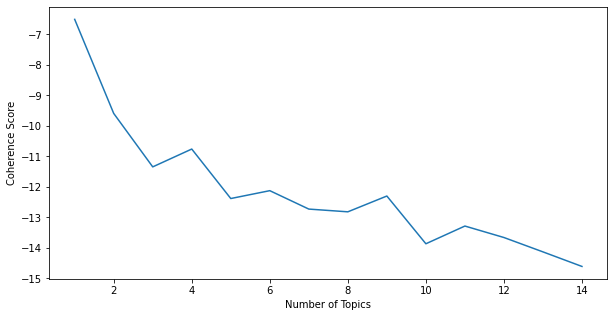

In [120]:
tweets_coherence = []
for nb_topics in range(1,15):
    lda = LdaModel(tweets_2014_corpus, num_topics = nb_topics, id2word = tweets_2014_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_2014_corpus, dictionary=tweets_2014_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

plt.figure(figsize=(10,5))
plt.plot(range(1,15),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [127]:
k = 1
tweets_lda = LdaModel(tweets_2014_corpus, num_topics = k, id2word = tweets_2014_dictionary, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

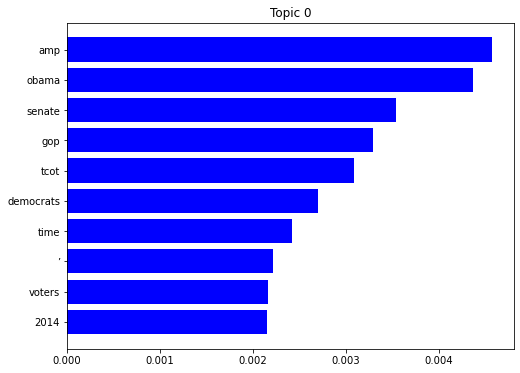

In [128]:
from matplotlib import gridspec
plot_top_words()